<table class="table table-bordered">
    <tr>
        <th style="text-align:center; width:25%"><img src='https://www.np.edu.sg/PublishingImages/Pages/default/odp/ICT.jpg' style="width: 250px; height: 125px; "></th>
        <th style="text-align:center;"><h1>Deep Learning</h1><h2>Assignment 1 - Food Classification Model (Individual)</h2><h3>AY2022/23 Semester</h3></th>
    </tr>
</table>

## Step 1: Data Loading

In [2]:
import os
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D
import matplotlib.pyplot as plt
from numpy import asarray
%matplotlib inline

## Step 2: Develop the Image Classification Models

In [3]:
base_dir = 'C:\\Users\\xinle\\ASG1'
img_size = 100

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
img_size = 100

train_datagen_aug = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

#  All images will be rescaled by 1./255
test_datagen = ImageDataGenerator(rescale=1./255)
train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_size, img_size),
        batch_size=25,
        class_mode='categorical')

train_generator_aug = train_datagen_aug.flow_from_directory(
        train_dir,
        target_size=(img_size, img_size),
        batch_size=25,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=25,
        class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


## Pre-train Models

### Baseline Model - Model 1 (VGG16) <a id="vgg_1"></a>

[Back to Model Evaluation](#vgg_1r)

#### No data augmentation - VGG16

In [66]:
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top= False,
                  input_shape=(img_size, img_size, 3), classes = 10 )

In [7]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 100, 100, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 100, 100, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 50, 50, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 50, 50, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 50, 50, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 25, 25, 128)       0     

In [ ]:
# 14,717,688 trainable params

In [8]:
conv_base.trainable = False

In [9]:
baselinevg1 = models.Sequential()
baselinevg1.add(conv_base)
baselinevg1.add(layers.Flatten())
baselinevg1.add(layers.Dense(256, activation='relu', input_dim=3*3*512))
baselinevg1.add(layers.Dropout(0.5))
baselinevg1.add(layers.Dense(10, activation='softmax'))

baselinevg1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 3, 3, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 256)               1179904   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 15,897,162
Trainable params: 1,182,474
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
# After freezing, there are only 1,182,474 trainable params

In [10]:
baselinevg1.compile(optimizer=optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['acc'])

historybase1vg = baselinevg1.fit(train_generator,
                    epochs=30,
                    batch_size=25,
                    validation_data=validation_generator)

Epoch 1/30
300/300 [==============================] - 1422s 5s/step - loss: 1.9720 - acc: 0.3209 - val_loss: 1.6474 - val_acc: 0.4545
Epoch 2/30
300/300 [==============================] - 1038s 3s/step - loss: 1.5387 - acc: 0.4844 - val_loss: 1.4739 - val_acc: 0.5110
Epoch 3/30
300/300 [==============================] - 1102s 4s/step - loss: 1.3627 - acc: 0.5549 - val_loss: 1.3886 - val_acc: 0.5405
Epoch 4/30
300/300 [==============================] - 973s 3s/step - loss: 1.2512 - acc: 0.5872 - val_loss: 1.3289 - val_acc: 0.5610
Epoch 5/30
300/300 [==============================] - 1044s 3s/step - loss: 1.1617 - acc: 0.6224 - val_loss: 1.3102 - val_acc: 0.5705
Epoch 6/30
300/300 [==============================] - 1092s 4s/step - loss: 1.0873 - acc: 0.6489 - val_loss: 1.2886 - val_acc: 0.5795
Epoch 7/30
300/300 [==============================] - 1122s 4s/step - loss: 1.0177 - acc: 0.6793 - val_loss: 1.2738 - val_acc: 0.5890
Epoch 8/30
300/300 [==============================] - 1079s 4s/

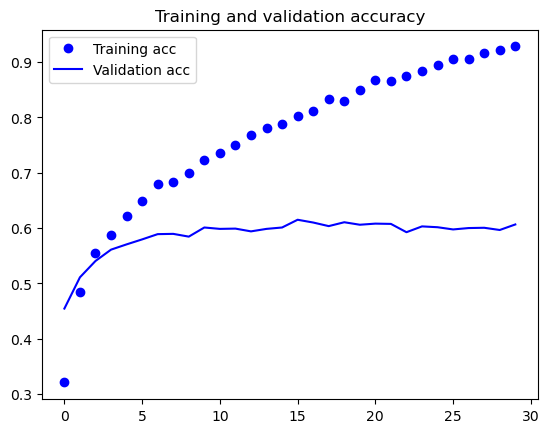

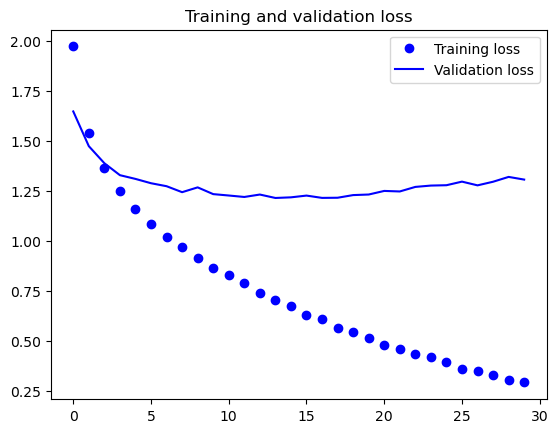

In [11]:
acc = historybase1vg .history['acc']
val_acc = historybase1vg .history['val_acc']
loss = historybase1vg .history['loss']
val_loss = historybase1vg .history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#### With data augmentation - VGG16

In [43]:
conv_base.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 49, 49, 32)   864         ['input_2[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 49, 49, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                       

 batch_normalization_10 (BatchN  (None, 10, 10, 96)  288         ['conv2d_10[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_11 (BatchN  (None, 10, 10, 32)  96          ['conv2d_11[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_5 (Activation)      (None, 10, 10, 64)   0           ['batch_normalization_5[0][0]']  
                                                                                                  
 activation_7 (Activation)      (None, 10, 10, 64)   0           ['batch_normalization_7[0][0]']  
                                                                                                  
 activatio

 conv2d_20 (Conv2D)             (None, 10, 10, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_23 (Conv2D)             (None, 10, 10, 96)   55296       ['activation_22[0][0]']          
                                                                                                  
 batch_normalization_20 (BatchN  (None, 10, 10, 48)  144         ['conv2d_20[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_23 (BatchN  (None, 10, 10, 96)  288         ['conv2d_23[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activatio

                                                                                                  
 conv2d_34 (Conv2D)             (None, 4, 4, 128)    98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_34 (BatchN  (None, 4, 4, 128)   384         ['conv2d_34[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_34 (Activation)     (None, 4, 4, 128)    0           ['batch_normalization_34[0][0]'] 
                                                                                                  
 conv2d_35 (Conv2D)             (None, 4, 4, 128)    114688      ['activation_34[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 activation_44 (Activation)     (None, 4, 4, 160)    0           ['batch_normalization_44[0][0]'] 
                                                                                                  
 conv2d_45 (Conv2D)             (None, 4, 4, 160)    179200      ['activation_44[0][0]']          
                                                                                                  
 batch_normalization_45 (BatchN  (None, 4, 4, 160)   480         ['conv2d_45[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_45 (Activation)     (None, 4, 4, 160)    0           ['batch_normalization_45[0][0]'] 
                                                                                                  
 conv2d_41

 batch_normalization_55 (BatchN  (None, 4, 4, 160)   480         ['conv2d_55[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_55 (Activation)     (None, 4, 4, 160)    0           ['batch_normalization_55[0][0]'] 
                                                                                                  
 conv2d_51 (Conv2D)             (None, 4, 4, 160)    122880      ['mixed5[0][0]']                 
                                                                                                  
 conv2d_56 (Conv2D)             (None, 4, 4, 160)    179200      ['activation_55[0][0]']          
                                                                                                  
 batch_normalization_51 (BatchN  (None, 4, 4, 160)   480         ['conv2d_51[0][0]']              
 ormalizat

 conv2d_61 (Conv2D)             (None, 4, 4, 192)    147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_66 (Conv2D)             (None, 4, 4, 192)    258048      ['activation_65[0][0]']          
                                                                                                  
 batch_normalization_61 (BatchN  (None, 4, 4, 192)   576         ['conv2d_61[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_66 (BatchN  (None, 4, 4, 192)   576         ['conv2d_66[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activatio

 ormalization)                                                                                    
                                                                                                  
 batch_normalization_74 (BatchN  (None, 4, 4, 192)   576         ['conv2d_74[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_70 (Activation)     (None, 4, 4, 192)    0           ['batch_normalization_70[0][0]'] 
                                                                                                  
 activation_74 (Activation)     (None, 4, 4, 192)    0           ['batch_normalization_74[0][0]'] 
                                                                                                  
 conv2d_71 (Conv2D)             (None, 1, 1, 320)    552960      ['activation_70[0][0]']          
          

                                                                                                  
 activation_82 (Activation)     (None, 1, 1, 384)    0           ['batch_normalization_82[0][0]'] 
                                                                                                  
 activation_83 (Activation)     (None, 1, 1, 384)    0           ['batch_normalization_83[0][0]'] 
                                                                                                  
 batch_normalization_84 (BatchN  (None, 1, 1, 192)   576         ['conv2d_84[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_76 (Activation)     (None, 1, 1, 320)    0           ['batch_normalization_76[0][0]'] 
                                                                                                  
 mixed9_0 

 ormalization)                                                                                    
                                                                                                  
 activation_85 (Activation)     (None, 1, 1, 320)    0           ['batch_normalization_85[0][0]'] 
                                                                                                  
 mixed9_1 (Concatenate)         (None, 1, 1, 768)    0           ['activation_87[0][0]',          
                                                                  'activation_88[0][0]']          
                                                                                                  
 concatenate_1 (Concatenate)    (None, 1, 1, 768)    0           ['activation_91[0][0]',          
                                                                  'activation_92[0][0]']          
                                                                                                  
 activatio

In [44]:
conv_base.trainable = False

In [45]:
baselinevg2 = models.Sequential()
baselinevg2.add(conv_base)
baselinevg2.add(layers.Flatten())
baselinevg2.add(layers.Dense(256, activation='relu', input_dim=1*1*2048))
baselinevg2.add(layers.Dropout(0.5))
baselinevg2.add(layers.Dense(10, activation='softmax'))

baselinevg2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 1, 1, 2048)        21802784  
                                                                 
 flatten_4 (Flatten)         (None, 2048)              0         
                                                                 
 dense_8 (Dense)             (None, 256)               524544    
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_9 (Dense)             (None, 10)                2570      
                                                                 
Total params: 22,329,898
Trainable params: 527,114
Non-trainable params: 21,802,784
_________________________________________________________________


In [46]:
baselinevg2.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=0.0001),
              metrics=['acc'])

historybase2vg = baselinevg2.fit(
      train_generator_aug,
      steps_per_epoch=300,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=80,
      verbose=1)

Epoch 1/30
300/300 [==============================] - 171s 554ms/step - loss: 1.9983 - acc: 0.3657 - val_loss: 1.5082 - val_acc: 0.5665
Epoch 2/30
300/300 [==============================] - 142s 475ms/step - loss: 1.5173 - acc: 0.5224 - val_loss: 1.2385 - val_acc: 0.5985
Epoch 3/30
300/300 [==============================] - 143s 476ms/step - loss: 1.3429 - acc: 0.5591 - val_loss: 1.1977 - val_acc: 0.6025
Epoch 4/30
300/300 [==============================] - 149s 497ms/step - loss: 1.2892 - acc: 0.5767 - val_loss: 1.1933 - val_acc: 0.6140
Epoch 5/30
300/300 [==============================] - 150s 498ms/step - loss: 1.2548 - acc: 0.5887 - val_loss: 1.1798 - val_acc: 0.6060
Epoch 6/30
300/300 [==============================] - 153s 511ms/step - loss: 1.2622 - acc: 0.5856 - val_loss: 1.1822 - val_acc: 0.6140
Epoch 7/30
300/300 [==============================] - 152s 507ms/step - loss: 1.2519 - acc: 0.5872 - val_loss: 1.1700 - val_acc: 0.6155
Epoch 8/30
300/300 [============================

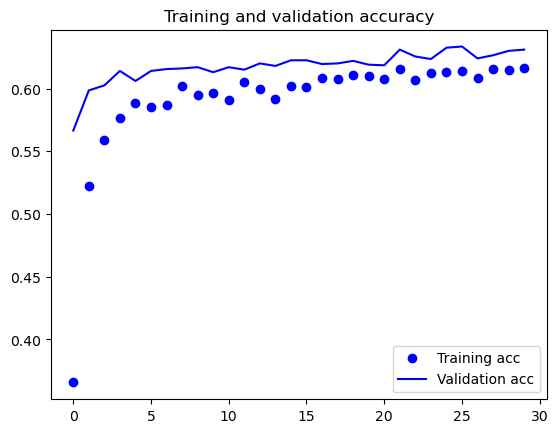

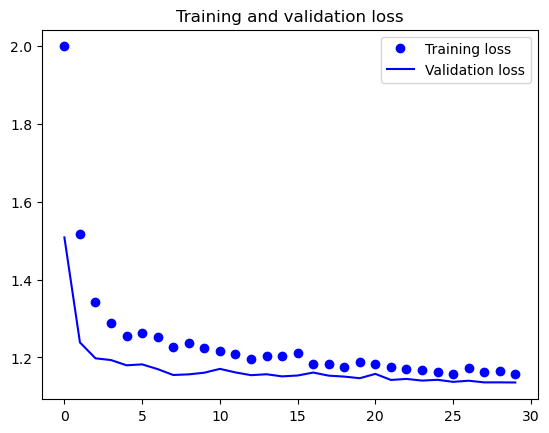

In [47]:
acc = historybase2vg.history['acc']
val_acc = historybase2vg.history['val_acc']
loss = historybase2vg.history['loss']
val_loss = historybase2vg.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#### Fine-tuning - VGG16

In [48]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'mixed6':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [49]:
baselinevg2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 1, 1, 2048)        21802784  
                                                                 
 flatten_4 (Flatten)         (None, 2048)              0         
                                                                 
 dense_8 (Dense)             (None, 256)               524544    
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_9 (Dense)             (None, 10)                2570      
                                                                 
Total params: 22,329,898
Trainable params: 15,479,050
Non-trainable params: 6,850,848
_________________________________________________________________


In [50]:
baselinevg2.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=1e-5),
              metrics=['acc'])

historybase2vg = baselinevg2.fit(
      train_generator_aug,
      steps_per_epoch=300,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=80)

Epoch 1/30
300/300 [==============================] - 326s 1s/step - loss: 1.2388 - acc: 0.5827 - val_loss: 1.1265 - val_acc: 0.6370
Epoch 2/30
300/300 [==============================] - 318s 1s/step - loss: 1.2433 - acc: 0.5868 - val_loss: 1.1132 - val_acc: 0.6395
Epoch 3/30
300/300 [==============================] - 313s 1s/step - loss: 1.2154 - acc: 0.5912 - val_loss: 1.1079 - val_acc: 0.6435
Epoch 4/30
300/300 [==============================] - 326s 1s/step - loss: 1.1970 - acc: 0.6035 - val_loss: 1.1001 - val_acc: 0.6445
Epoch 5/30
300/300 [==============================] - 337s 1s/step - loss: 1.1914 - acc: 0.6115 - val_loss: 1.0917 - val_acc: 0.6440
Epoch 6/30
300/300 [==============================] - 618s 2s/step - loss: 1.1939 - acc: 0.6011 - val_loss: 1.0845 - val_acc: 0.6510
Epoch 7/30
300/300 [==============================] - 459s 2s/step - loss: 1.1758 - acc: 0.6029 - val_loss: 1.0775 - val_acc: 0.6460
Epoch 8/30
300/300 [==============================] - 499s 2s/step - 

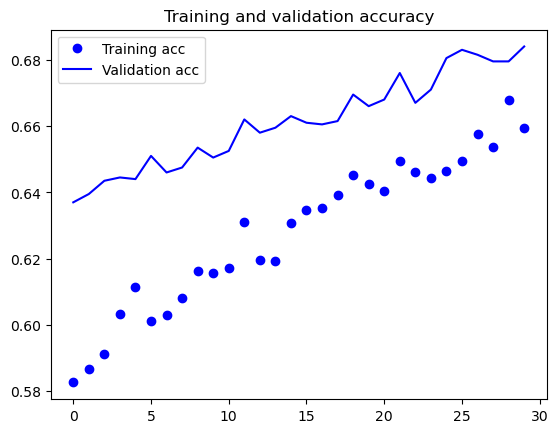

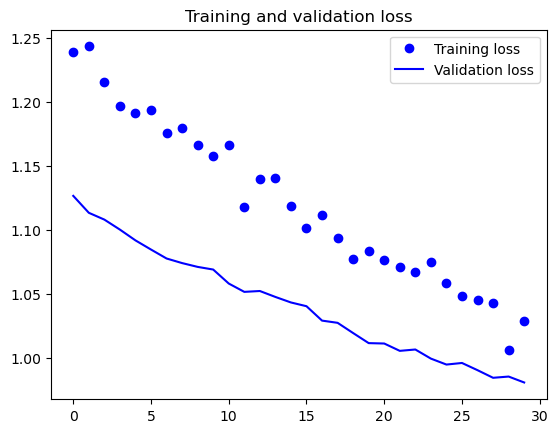

In [51]:
acc = historybase2vg.history['acc']
val_acc = historybase2vg.history['val_acc']
loss = historybase2vg.history['loss']
val_loss = historybase2vg.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [53]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=25,
        class_mode='categorical')

test_loss, test_acc = baselinevg2.evaluate(test_generator, steps=20)
print('test acc:', test_acc)

Found 500 images belonging to 10 classes.
20/20 [==============================] - 6s 310ms/step - loss: 1.0165 - acc: 0.6580
test acc: 0.6579999923706055


In [71]:
baselinevg2.save('modelvgg1.h5')

### Model 2 (VGG16) :

Epochs : 50.
Since our baseline model did not overfit, we will increase the number of epochs to test for overfitting. This is so we know what is the most optimal number of epochs to use before our model starts to overfit

#### With data augmentation -  VGG16 (model 2)

In [ ]:
# cher,, didnt have time to finish the fine tuning but yes.. keep here for memory sake to remind me i shld start
# my work early and not neglect dl.....i am in deep regrets writing this 

In [67]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 100, 100, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 100, 100, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 50, 50, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 50, 50, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 50, 50, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 25, 25, 128)       0     

In [68]:
conv_base.trainable = False

In [69]:
modelvg1 = models.Sequential()
modelvg1.add(conv_base)
modelvg1.add(layers.Flatten())
modelvg1.add(layers.Dense(256, activation='relu', input_dim=1*1*2048))
modelvg1.add(layers.Dropout(0.5))
modelvg1.add(layers.Dense(10, activation='softmax'))

modelvg1.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 3, 3, 512)         14714688  
                                                                 
 flatten_6 (Flatten)         (None, 4608)              0         
                                                                 
 dense_12 (Dense)            (None, 256)               1179904   
                                                                 
 dropout_6 (Dropout)         (None, 256)               0         
                                                                 
 dense_13 (Dense)            (None, 10)                2570      
                                                                 
Total params: 15,897,162
Trainable params: 1,182,474
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
modelvg1.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=0.0001),
              metrics=['acc'])

historymodel1vg = modelvg1.fit(
      train_generator_aug,
      steps_per_epoch=300,
      epochs=50,
      validation_data=validation_generator,
      validation_steps=80,
      verbose=1)

Epoch 1/50
300/300 [==============================] - 768s 3s/step - loss: 1.7721 - acc: 0.3948 - val_loss: 1.5817 - val_acc: 0.4765
Epoch 2/50
300/300 [==============================] - 770s 3s/step - loss: 1.6536 - acc: 0.4371 - val_loss: 1.4997 - val_acc: 0.4975
Epoch 3/50
300/300 [==============================] - 781s 3s/step - loss: 1.5962 - acc: 0.4611 - val_loss: 1.4778 - val_acc: 0.5100
Epoch 4/50
300/300 [==============================] - 739s 2s/step - loss: 1.5287 - acc: 0.4788 - val_loss: 1.4088 - val_acc: 0.5350
Epoch 5/50
300/300 [==============================] - 638s 2s/step - loss: 1.5040 - acc: 0.4895 - val_loss: 1.3675 - val_acc: 0.5445
Epoch 6/50
300/300 [==============================] - 701s 2s/step - loss: 1.4573 - acc: 0.5060 - val_loss: 1.3667 - val_acc: 0.5465
Epoch 7/50
300/300 [==============================] - 834s 3s/step - loss: 1.4361 - acc: 0.5100 - val_loss: 1.3197 - val_acc: 0.5585
Epoch 8/50
300/300 [==============================] - 724s 2s/step - 

In [ ]:
acc = historymodel1vg.history['acc']
val_acc = historymodel1vg.history['val_acc']
loss = historymodel1vg.history['loss']
val_loss = historymodel1vg.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#### Fine-tuning - VGG16 (Model 2)

In [ ]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'mixed6':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [ ]:
modelvg1.summary()

In [ ]:
modelvg1.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=1e-5),
              metrics=['acc'])

historymodel1vg = modelvg1.fit(
      train_generator_aug,
      steps_per_epoch=300,
      epochs=50,
      validation_data=validation_generator,
      validation_steps=80)

In [ ]:
acc = historymodel1vg.history['acc']
val_acc = historymodel1vg.history['val_acc']
loss = historymodel1vg.history['loss']
val_loss = historymodel1vg.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=25,
        class_mode='categorical')

test_loss, test_acc = historymodel1vg.evaluate(test_generator, steps=20)
print('test acc:', test_acc)

In [ ]:
modelvg1.save('modelvgg2.h5')

### Baseline Model - Model 1 (InceptionV3) <a id="inc_1"></a>

[Back to Model Evaluation](#inc_1r)

#### No data augmentation -  InceptionV3

In [14]:
from tensorflow.keras.applications import InceptionV3

conv_base = InceptionV3(weights='imagenet',
                  include_top= False,
                  input_shape=(img_size, img_size, 3), classes = 10 )

87910968/87910968 [==============================] - 5s 0us/step


In [15]:
conv_base.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 49, 49, 32)   864         ['input_2[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 49, 49, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                       

 batch_normalization_10 (BatchN  (None, 10, 10, 96)  288         ['conv2d_10[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_11 (BatchN  (None, 10, 10, 32)  96          ['conv2d_11[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_5 (Activation)      (None, 10, 10, 64)   0           ['batch_normalization_5[0][0]']  
                                                                                                  
 activation_7 (Activation)      (None, 10, 10, 64)   0           ['batch_normalization_7[0][0]']  
                                                                                                  
 activatio

 conv2d_20 (Conv2D)             (None, 10, 10, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_23 (Conv2D)             (None, 10, 10, 96)   55296       ['activation_22[0][0]']          
                                                                                                  
 batch_normalization_20 (BatchN  (None, 10, 10, 48)  144         ['conv2d_20[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_23 (BatchN  (None, 10, 10, 96)  288         ['conv2d_23[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activatio

                                                                                                  
 conv2d_34 (Conv2D)             (None, 4, 4, 128)    98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_34 (BatchN  (None, 4, 4, 128)   384         ['conv2d_34[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_34 (Activation)     (None, 4, 4, 128)    0           ['batch_normalization_34[0][0]'] 
                                                                                                  
 conv2d_35 (Conv2D)             (None, 4, 4, 128)    114688      ['activation_34[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 activation_44 (Activation)     (None, 4, 4, 160)    0           ['batch_normalization_44[0][0]'] 
                                                                                                  
 conv2d_45 (Conv2D)             (None, 4, 4, 160)    179200      ['activation_44[0][0]']          
                                                                                                  
 batch_normalization_45 (BatchN  (None, 4, 4, 160)   480         ['conv2d_45[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_45 (Activation)     (None, 4, 4, 160)    0           ['batch_normalization_45[0][0]'] 
                                                                                                  
 conv2d_41

 batch_normalization_55 (BatchN  (None, 4, 4, 160)   480         ['conv2d_55[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_55 (Activation)     (None, 4, 4, 160)    0           ['batch_normalization_55[0][0]'] 
                                                                                                  
 conv2d_51 (Conv2D)             (None, 4, 4, 160)    122880      ['mixed5[0][0]']                 
                                                                                                  
 conv2d_56 (Conv2D)             (None, 4, 4, 160)    179200      ['activation_55[0][0]']          
                                                                                                  
 batch_normalization_51 (BatchN  (None, 4, 4, 160)   480         ['conv2d_51[0][0]']              
 ormalizat

 conv2d_61 (Conv2D)             (None, 4, 4, 192)    147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_66 (Conv2D)             (None, 4, 4, 192)    258048      ['activation_65[0][0]']          
                                                                                                  
 batch_normalization_61 (BatchN  (None, 4, 4, 192)   576         ['conv2d_61[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_66 (BatchN  (None, 4, 4, 192)   576         ['conv2d_66[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activatio

 ormalization)                                                                                    
                                                                                                  
 batch_normalization_74 (BatchN  (None, 4, 4, 192)   576         ['conv2d_74[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_70 (Activation)     (None, 4, 4, 192)    0           ['batch_normalization_70[0][0]'] 
                                                                                                  
 activation_74 (Activation)     (None, 4, 4, 192)    0           ['batch_normalization_74[0][0]'] 
                                                                                                  
 conv2d_71 (Conv2D)             (None, 1, 1, 320)    552960      ['activation_70[0][0]']          
          

                                                                                                  
 activation_82 (Activation)     (None, 1, 1, 384)    0           ['batch_normalization_82[0][0]'] 
                                                                                                  
 activation_83 (Activation)     (None, 1, 1, 384)    0           ['batch_normalization_83[0][0]'] 
                                                                                                  
 batch_normalization_84 (BatchN  (None, 1, 1, 192)   576         ['conv2d_84[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_76 (Activation)     (None, 1, 1, 320)    0           ['batch_normalization_76[0][0]'] 
                                                                                                  
 mixed9_0 

 ormalization)                                                                                    
                                                                                                  
 activation_85 (Activation)     (None, 1, 1, 320)    0           ['batch_normalization_85[0][0]'] 
                                                                                                  
 mixed9_1 (Concatenate)         (None, 1, 1, 768)    0           ['activation_87[0][0]',          
                                                                  'activation_88[0][0]']          
                                                                                                  
 concatenate_1 (Concatenate)    (None, 1, 1, 768)    0           ['activation_91[0][0]',          
                                                                  'activation_92[0][0]']          
                                                                                                  
 activatio

In [16]:
conv_base.trainable = False

In [21]:
baselineic1 = models.Sequential()
baselineic1.add(conv_base)
baselineic1.add(layers.Flatten())
baselineic1.add(layers.Dense(256, activation='relu', input_dim=1*1*2048))
baselineic1.add(layers.Dropout(0.5))
baselineic1.add(layers.Dense(10, activation='softmax'))

baselineic1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 1, 1, 2048)        21802784  
                                                                 
 flatten_2 (Flatten)         (None, 2048)              0         
                                                                 
 dense_4 (Dense)             (None, 256)               524544    
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                2570      
                                                                 
Total params: 22,329,898
Trainable params: 527,114
Non-trainable params: 21,802,784
_________________________________________________________________


In [23]:
baselineic1.compile(optimizer=optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['acc'])

historybase1ic = baselineic1.fit(train_generator,
                    epochs=30,
                    batch_size=25,
                    validation_data=validation_generator)

Epoch 1/30
300/300 [==============================] - 109s 348ms/step - loss: 1.8731 - acc: 0.3581 - val_loss: 1.6494 - val_acc: 0.4515
Epoch 2/30
300/300 [==============================] - 107s 357ms/step - loss: 1.5653 - acc: 0.4617 - val_loss: 1.5501 - val_acc: 0.4805
Epoch 3/30
300/300 [==============================] - 108s 361ms/step - loss: 1.4508 - acc: 0.5113 - val_loss: 1.5022 - val_acc: 0.5075
Epoch 4/30
300/300 [==============================] - 105s 350ms/step - loss: 1.3676 - acc: 0.5407 - val_loss: 1.4891 - val_acc: 0.5110
Epoch 5/30
300/300 [==============================] - 108s 361ms/step - loss: 1.2748 - acc: 0.5651 - val_loss: 1.4936 - val_acc: 0.5075
Epoch 6/30
300/300 [==============================] - 106s 354ms/step - loss: 1.2090 - acc: 0.5883 - val_loss: 1.5171 - val_acc: 0.5070
Epoch 7/30
300/300 [==============================] - 105s 350ms/step - loss: 1.1723 - acc: 0.5979 - val_loss: 1.4988 - val_acc: 0.5200
Epoch 8/30
300/300 [============================

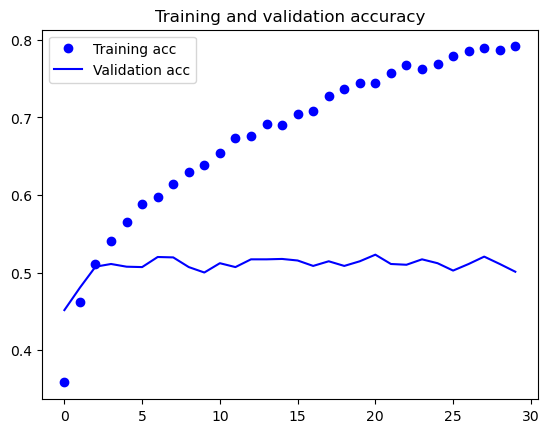

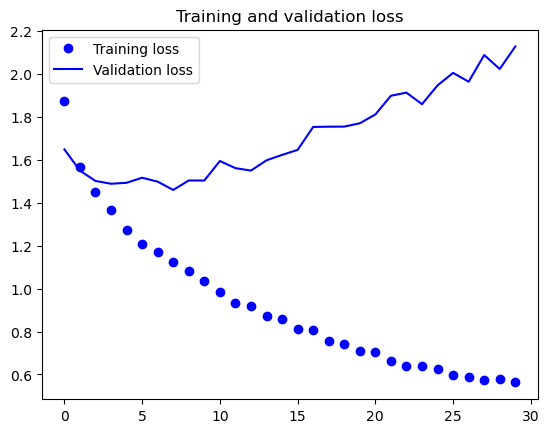

In [24]:
acc = historybase1ic .history['acc']
val_acc = historybase1ic .history['val_acc']
loss = historybase1ic .history['loss']
val_loss = historybase1ic .history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#### With data augmentation - InceptionV3

In [26]:
baselineic2 = models.Sequential()
baselineic2.add(conv_base)
baselineic2.add(layers.Flatten())
baselineic2.add(layers.Dense(256, activation='relu', input_dim=1*1*2048))
baselineic2.add(layers.Dropout(0.5))
baselineic2.add(layers.Dense(10, activation='softmax'))

baselineic1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 1, 1, 2048)        21802784  
                                                                 
 flatten_2 (Flatten)         (None, 2048)              0         
                                                                 
 dense_4 (Dense)             (None, 256)               524544    
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                2570      
                                                                 
Total params: 22,329,898
Trainable params: 527,114
Non-trainable params: 21,802,784
_________________________________________________________________


In [27]:
baselineic2.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=0.001),
              metrics=['acc'])

historybase2ic = baselineic2.fit(
      train_generator_aug,
      steps_per_epoch=300,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=80,
      verbose=1)

Epoch 1/30
300/300 [==============================] - 139s 449ms/step - loss: 2.1158 - acc: 0.2748 - val_loss: 1.7844 - val_acc: 0.3985
Epoch 2/30
300/300 [==============================] - 127s 423ms/step - loss: 1.8653 - acc: 0.3505 - val_loss: 1.6583 - val_acc: 0.4500
Epoch 3/30
300/300 [==============================] - 125s 417ms/step - loss: 1.7959 - acc: 0.3895 - val_loss: 1.5876 - val_acc: 0.4960
Epoch 4/30
300/300 [==============================] - 124s 414ms/step - loss: 1.7448 - acc: 0.3955 - val_loss: 1.5439 - val_acc: 0.4920
Epoch 5/30
300/300 [==============================] - 127s 423ms/step - loss: 1.7016 - acc: 0.4129 - val_loss: 1.5180 - val_acc: 0.4990
Epoch 6/30
300/300 [==============================] - 124s 414ms/step - loss: 1.6948 - acc: 0.4235 - val_loss: 1.5169 - val_acc: 0.4975
Epoch 7/30
300/300 [==============================] - 128s 428ms/step - loss: 1.6975 - acc: 0.4239 - val_loss: 1.5240 - val_acc: 0.5010
Epoch 8/30
300/300 [============================

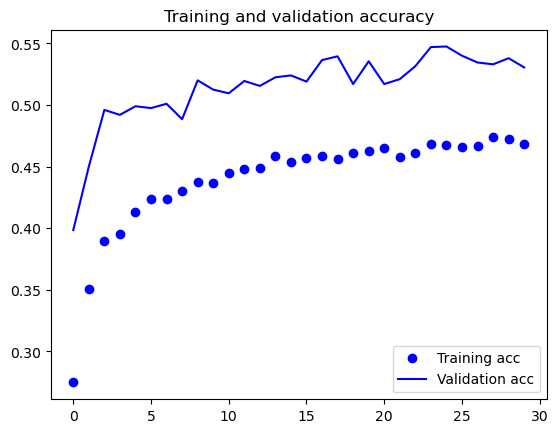

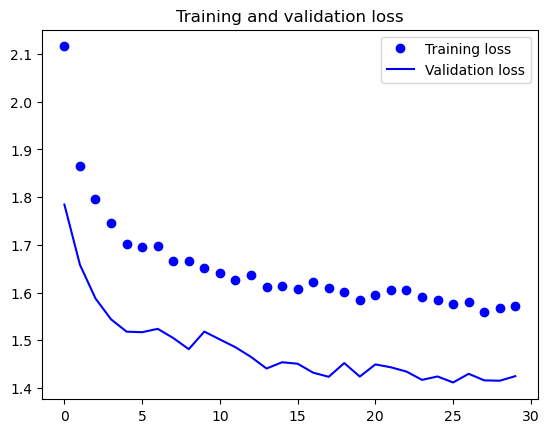

In [28]:
acc = historybase2ic.history['acc']
val_acc = historybase2ic.history['val_acc']
loss = historybase2ic.history['loss']
val_loss = historybase2ic.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#### Fine-tuning - InceptionV3

In [33]:
baselineic2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 1, 1, 2048)        21802784  
                                                                 
 flatten_3 (Flatten)         (None, 2048)              0         
                                                                 
 dense_6 (Dense)             (None, 256)               524544    
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 10)                2570      
                                                                 
Total params: 22,329,898
Trainable params: 527,114
Non-trainable params: 21,802,784
_________________________________________________________________


In [34]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'mixed6':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [35]:
baselineic2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 1, 1, 2048)        21802784  
                                                                 
 flatten_3 (Flatten)         (None, 2048)              0         
                                                                 
 dense_6 (Dense)             (None, 256)               524544    
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 10)                2570      
                                                                 
Total params: 22,329,898
Trainable params: 15,479,050
Non-trainable params: 6,850,848
_________________________________________________________________


In [37]:
baselineic2.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=1e-5),
              metrics=['acc'])

historybase2ic = baselineic2.fit(
      train_generator_aug,
      steps_per_epoch=300,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=80)

Epoch 1/30
300/300 [==============================] - 440s 1s/step - loss: 2.2064 - acc: 0.1941 - val_loss: 2.1266 - val_acc: 0.2680
Epoch 2/30
300/300 [==============================] - 346s 1s/step - loss: 2.0739 - acc: 0.2596 - val_loss: 1.9347 - val_acc: 0.3585
Epoch 3/30
300/300 [==============================] - 421s 1s/step - loss: 1.9500 - acc: 0.3227 - val_loss: 1.8100 - val_acc: 0.4085
Epoch 4/30
300/300 [==============================] - 418s 1s/step - loss: 1.8726 - acc: 0.3515 - val_loss: 1.7139 - val_acc: 0.4435
Epoch 5/30
300/300 [==============================] - 461s 2s/step - loss: 1.7786 - acc: 0.3876 - val_loss: 1.6360 - val_acc: 0.4725
Epoch 6/30
300/300 [==============================] - 433s 1s/step - loss: 1.7486 - acc: 0.3961 - val_loss: 1.5611 - val_acc: 0.4875
Epoch 7/30
300/300 [==============================] - 401s 1s/step - loss: 1.7128 - acc: 0.4171 - val_loss: 1.5343 - val_acc: 0.4915
Epoch 8/30
300/300 [==============================] - 356s 1s/step - 

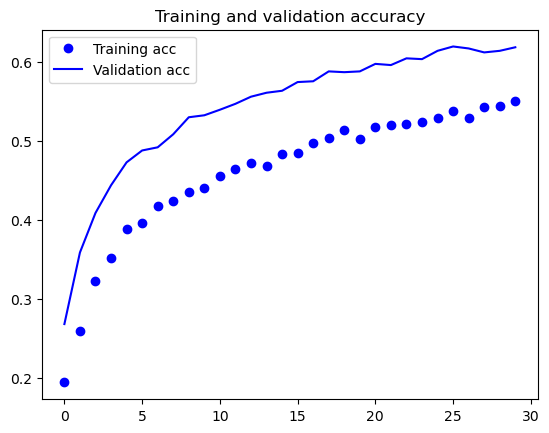

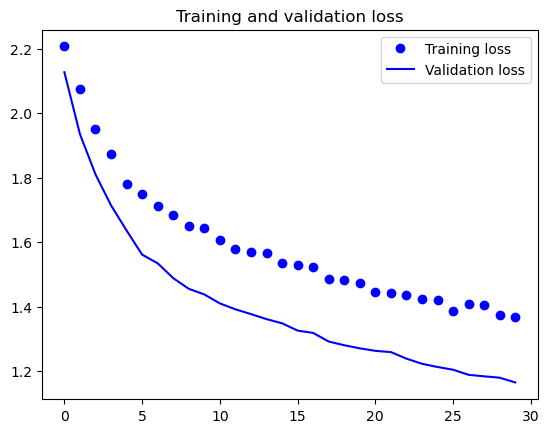

In [38]:
acc = historybase2ic.history['acc']
val_acc = historybase2ic.history['val_acc']
loss = historybase2ic.history['loss']
val_loss = historybase2ic.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [74]:
baselineic2.save('model1inc.h5')

## Step 3 – Evaluate the Developed Models using Testing Images

[To model - VGG Model 1](#vgg_1) <a id="vgg_1r"></a>

In [72]:
baselinevg2 = keras.models.load_model('modelvgg1.h5')

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=25,
        class_mode='categorical')

test_loss, test_acc = baselinevg2.evaluate(test_generator, steps=20)
print('test acc:', test_acc)

Found 500 images belonging to 10 classes.
20/20 [==============================] - 9s 315ms/step - loss: 1.0047 - acc: 0.6520
test acc: 0.6520000100135803


[To model - INC Model 1](#inc_1) <a id="inc_1r"></a>

In [75]:
baselineic2 = keras.models.load_model('model1inc.h5')

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=25,
        class_mode='categorical')

test_loss, test_acc = baselineic2.evaluate(test_generator, steps=20)
print('test acc:', test_acc)

Found 500 images belonging to 10 classes.
20/20 [==============================] - 11s 415ms/step - loss: 1.0916 - acc: 0.6440
test acc: 0.6439999938011169


## Step 4  – Use the best model to make prediction

In [76]:
# Load the model
model = keras.models.load_model('modelvgg1.h5')

In [77]:
# Load the food list (in alphabetical order)
with open('C:\\Users\\xinle\\ASG1\\4.txt', 'r') as f: # the .txt file which contains a list of food assigned to you
    x = f.readlines()
food_list =[]
for item in x:
    food_list.append(item.strip('\n'))
food_list = sorted(food_list) # food_list needs to be sorted alphabetically before feed into prediction() function
print(food_list)

['chicken_quesadilla', 'deviled_eggs', 'dumplings', 'falafel', 'french_toast', 'grilled_cheese_sandwich', 'gyoza', 'onion_rings', 'pizza', 'takoyaki']


In [78]:
# Define some related functions for image process and model prediction
from tensorflow.keras.preprocessing.image import load_img, img_to_array
def image_process(img):
    image = load_img(img, target_size =(img_size, img_size))
    image_array = img_to_array(image)/255
    return image_array

import pandas as pd
def prediction(model, img_array, items_l):
    prob = model.predict(img_array.reshape(1,img_size,img_size,3))
    pro_df = pd.DataFrame(prob, columns = items_l)
    result = items_l[np.argmax(prob)]
    return pro_df, result

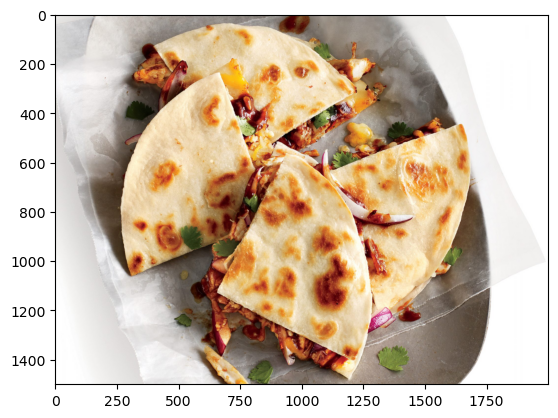

1/1 [==============================] - 0s 55ms/step
The prediction is:  chicken_quesadilla 

    chicken_quesadilla  deviled_eggs  dumplings   falafel  french_toast  \
0            0.963843      0.000309   0.000488  0.010912      0.001864   

   grilled_cheese_sandwich     gyoza  onion_rings     pizza  takoyaki  
0                 0.004076  0.001803     0.000003  0.014774  0.001927  


In [90]:
import matplotlib.pyplot as plt
img = 'C:\\Users\\xinle\\ASG1\\ChickenQuesadilla.jpg'
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)

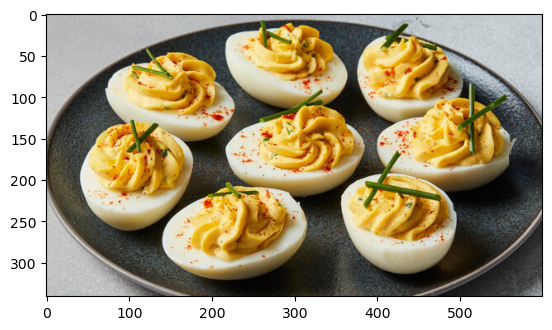

1/1 [==============================] - 0s 43ms/step
The prediction is:  deviled_eggs 

    chicken_quesadilla  deviled_eggs  dumplings   falafel  french_toast  \
0            0.000368      0.914984   0.006954  0.067901      0.003182   

   grilled_cheese_sandwich     gyoza  onion_rings     pizza  takoyaki  
0                 0.000286  0.001308     0.000353  0.000108  0.004557  


In [80]:
img = 'C:\\Users\\xinle\\ASG1\\deviledeggs.jpg'
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)

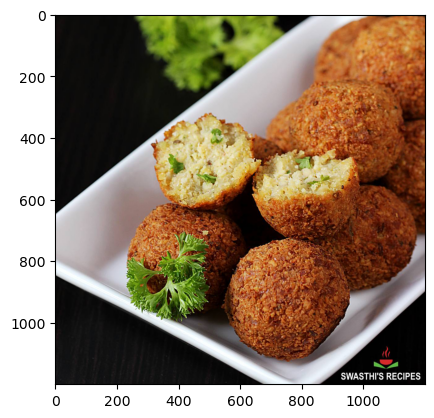

1/1 [==============================] - 0s 41ms/step
The prediction is:  falafel 

    chicken_quesadilla  deviled_eggs  dumplings   falafel  french_toast  \
0            0.001106      0.005132   0.000015  0.990645      0.000658   

   grilled_cheese_sandwich     gyoza  onion_rings     pizza  takoyaki  
0                 0.000659  0.000011     0.000111  0.000087  0.001576  


In [83]:
img = 'C:\\Users\\xinle\\ASG1\\falafel.jpg' 
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)

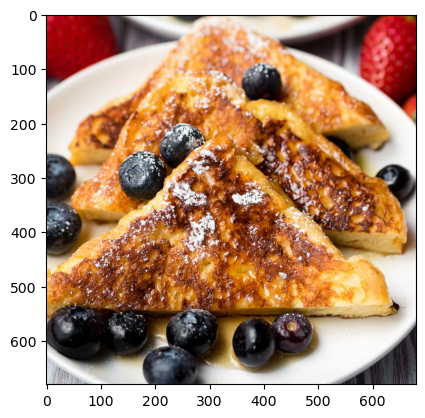

1/1 [==============================] - 0s 61ms/step
The prediction is:  french_toast 

    chicken_quesadilla  deviled_eggs  dumplings   falafel  french_toast  \
0            0.000167  4.880210e-07   0.000026  0.000029      0.998807   

   grilled_cheese_sandwich     gyoza  onion_rings     pizza  takoyaki  
0                 0.000197  0.000532     0.000031  0.000096  0.000114  


In [88]:
img = 'C:\\Users\\xinle\\ASG1\\frenchtoast.jpg' 
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)

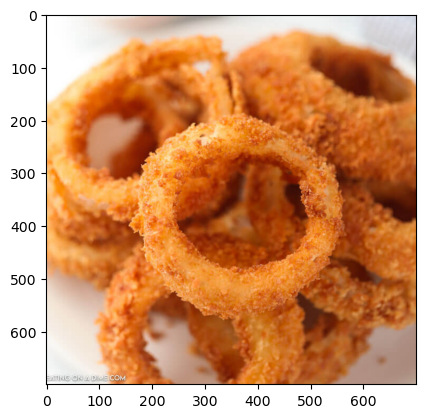

1/1 [==============================] - 0s 47ms/step
The prediction is:  onion_rings 

    chicken_quesadilla  deviled_eggs  dumplings  falafel  french_toast  \
0            0.000002      0.000033   0.000021  0.00004      0.000071   

   grilled_cheese_sandwich     gyoza  onion_rings     pizza  takoyaki  
0                 0.000083  0.000007     0.999702  0.000028  0.000012  


In [85]:
img = 'C:\\Users\\xinle\\ASG1\\onionrings.jpg' 
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)

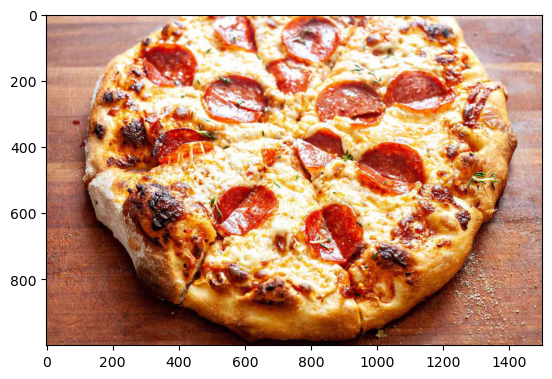

1/1 [==============================] - 0s 39ms/step
The prediction is:  pizza 

    chicken_quesadilla  deviled_eggs  dumplings   falafel  french_toast  \
0            0.012017      0.007311   0.000996  0.002739      0.004434   

   grilled_cheese_sandwich     gyoza  onion_rings     pizza  takoyaki  
0                  0.00117  0.001049     0.000416  0.966267  0.003602  


In [86]:
img = 'C:\\Users\\xinle\\ASG1\\pizza.jpg'
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)

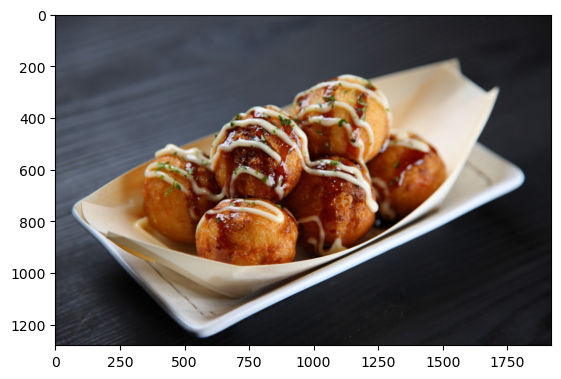

1/1 [==============================] - 0s 44ms/step
The prediction is:  takoyaki 

    chicken_quesadilla  deviled_eggs  dumplings   falafel  french_toast  \
0            0.000889      0.000643   0.001865  0.001055      0.003159   

   grilled_cheese_sandwich    gyoza  onion_rings     pizza  takoyaki  
0                 0.000674  0.00547     0.000346  0.002408   0.98349  


In [87]:
img = 'C:\\Users\\xinle\\ASG1\\takoyaki.jpg' 
plt.imshow(plt.imread(img))
plt.show()
img_array = image_process(img)
prob_df, result = prediction(model, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)